In [12]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('..')
# import ext.minimal_lczero.new_data_pipeline as dp
from IPython.display import display, SVG, clear_output
from pathlib import Path
from tqdm import tqdm
from matplotlib import pyplot as plt
import numpy as np
import chess
import torch
import time
from ext.minimal_lczero.policy_index import policy_index as POLICY_INDEX
from src.leela_data import Lc0Loader, Lc0TeacherDataset
from src.util import save_gif
import src.new_data_pipeline as ndp

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
chunk_dir = '/Users/max/ml/chesshacks-training/data/small'
files = list(Path(chunk_dir).glob("*.gz"))
dataset = Lc0Loader(files=files)
cnt = 0
for dp in dataset:
    board, policy, value = dp.board, dp.policy, dp.value
    cnt += 1
    # if cnt == 1000:
    #     break
    # display(SVG(board._repr_svg_()))
    print(value)
    break
    # clear_output(wait=True)


0.16958416


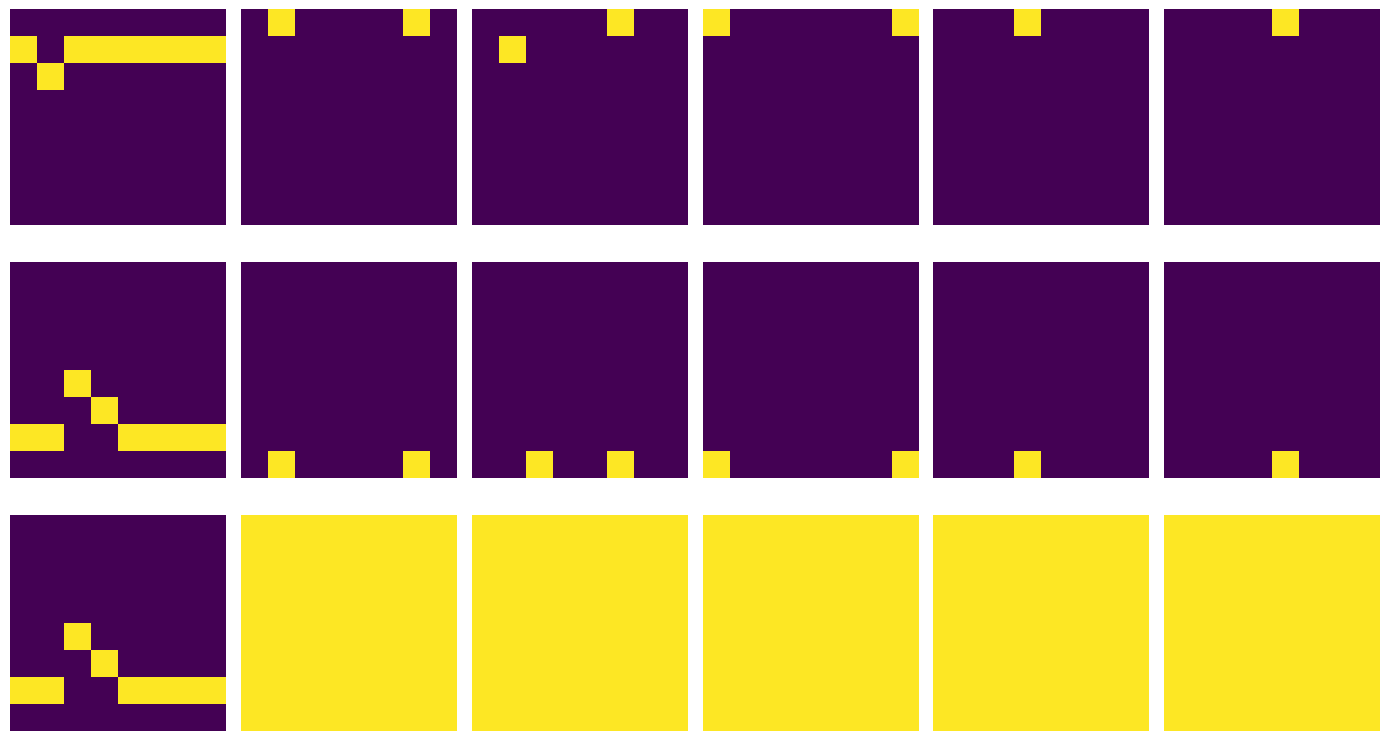

In [14]:
torch.manual_seed(0)
dataset = Lc0TeacherDataset(
    lc0_loader=Lc0Loader(files=files)
)
board, mask, policy, value = next(iter(dataset))
fig, axes = plt.subplots(3, 6, figsize=(14, 8))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(
        board[i].numpy(),
        # cmap='gray',
        vmin=0,
        vmax=1,
    )
    ax.axis('off')
plt.tight_layout()
plt.show()

In [15]:
policy_index = np.array(POLICY_INDEX)

In [28]:
chunk_dir = Path('/Users/max/ml/chesshacks-training/data/small')
batch_size = 1024
num_workers = 16
shuffle_buffer_size = 1024 * 100
skip_factor = 32
files = list(tqdm(chunk_dir.glob("**/*"), desc="Files scanned", unit=" files"))
generator = ndp.multiprocess_generator(
    chunk_dir=chunk_dir,
    batch_size=1024,
    num_workers=num_workers,
    shuffle_buffer_size=shuffle_buffer_size,
    skip_factor=skip_factor,
    validation=False,
)

# gen_callable = dp.make_callable(
#     chunk_dir=test_dir,
#     batch_size=batch_size,
#     num_workers=num_workers,
#     skip_factor=skip_factor,
#     shuffle_buffer_size=shuffle_buffer_size,
# )

Files scanned: 1 files [00:00, 2811.20 files/s]


In [46]:
chunk_dir = Path("/Users/max/ml/chesshacks-training/data/small")
batch_size = 1024
num_workers = 4
shuffle_buffer_size = 1024  # smaller for initial test
skip_factor = 32

generator = ndp.multiprocess_generator(
    chunk_dir=chunk_dir,
    batch_size=batch_size,
    num_workers=num_workers,
    shuffle_buffer_size=shuffle_buffer_size,
    skip_factor=skip_factor,
    validation=False,
)

batch = next(generator)  # should now return quickly
# inputs, policy, z, q, ply_count = batch  # match training pipeline
# print(inputs.shape, policy.shape, z.shape, q.shape, ply_count.shape)
for item in batch:
    print(item.shape)

Scanning directory for game data chunks...


Files scanned: 1 files [00:00, 3196.88 files/s]


1 matching files.
Done!


Filling shuffle buffer: 100%|██████████| 1/1 [00:00<00:00,  6.44it/s]


(1024, 112, 64)
(1024, 1858)
(1024, 3)
(1024, 3)
(1024, 1)


In [ ]:
batch = next(generator)
for part in batch:
    print(part.shape)
array_shapes = [
    tuple([batch_size] + list(shape)) for shape in dp.ARRAY_SHAPES_WITHOUT_BATCH
]
# inputs, policy, z, q, ply_count
# inputs: bit_planes, unit_planes (5), rule50_plane (1), zero_plane (1), one_plane (1)

# z: z_q_w, z_d, z_q_l
# q: best_q_w, best_d, best_q_l
array_shapes

(5, 112, 64)
(5, 1858)
(5, 3)
(5, 3)
(5, 1)


[(1024, 112, 64), (1024, 1858), (1024, 3), (1024, 3), (1024, 1)]

array([[ 0.0017762, -1.       , -1.       , ..., -1.       , -1.       ,
        -1.       ],
       [-1.       , -1.       , -1.       , ..., -1.       , -1.       ,
        -1.       ],
       [ 0.0017762, -1.       , -1.       , ..., -1.       , -1.       ,
        -1.       ],
       [-1.       , -1.       , -1.       , ..., -1.       , -1.       ,
        -1.       ],
       [-1.       , -1.       , -1.       , ..., -1.       , -1.       ,
        -1.       ]], shape=(5, 1858), dtype=float32)

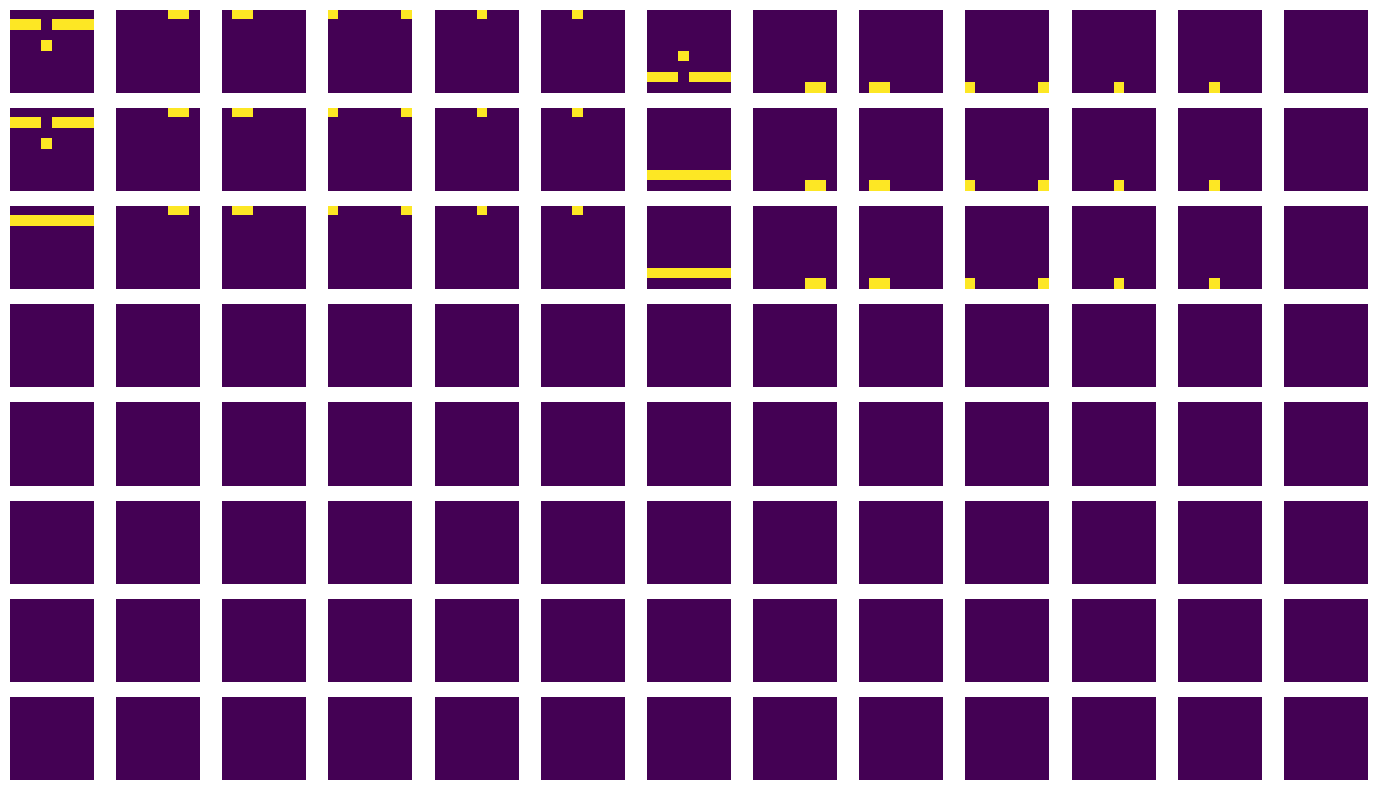

In [94]:
idx = 4
fig, axes = plt.subplots(8, 13, figsize=(14, 8))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(
        batch[0][idx, i].reshape(8, 8)
    )
    ax.axis('off')
plt.tight_layout()
plt.show()
# [PAWN, KNIGHT, BISHOP, ROOK, QUEEN, KING]

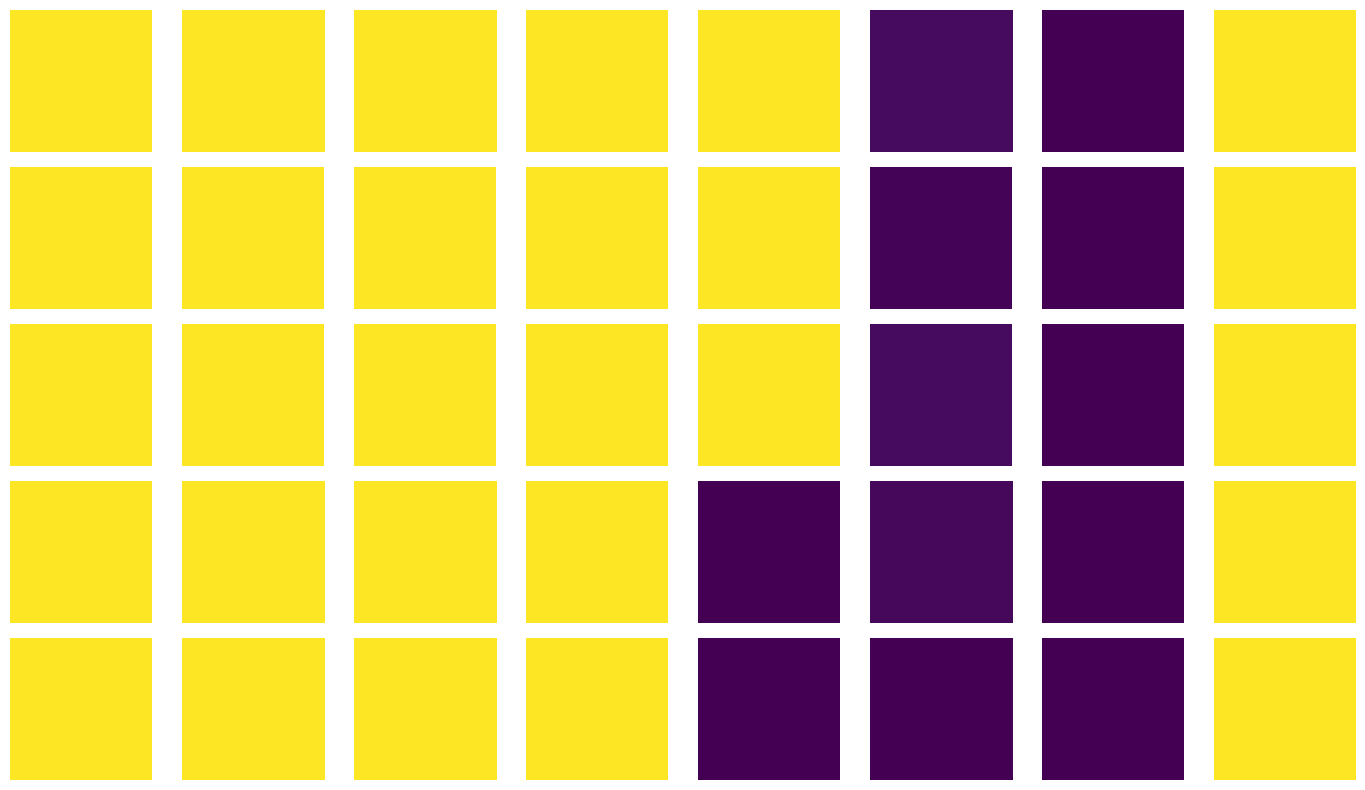

In [93]:
idx = 0
fig, axes = plt.subplots(5, 8, figsize=(14, 8))
planes = [-8, -7, -6, -5, -4, -3, -2, -1]
for idx in range(5):
    for i, ax in enumerate(axes[idx].flatten()):
        ax.imshow(
            batch[0][idx, planes[i]].reshape(8, 8),
            vmin=0, vmax=1,
        )
        ax.axis('off')
plt.tight_layout()
plt.show()
# [PAWN, KNIGHT, BISHOP, ROOK, QUEEN, KING]

In [99]:
mask = batch[1][idx] != -1
# batch[1][idx][mask].
batch[1][idx][mask]

array([0.00894855, 0.00223714, 0.00223714, 0.00223714, 0.00223714,
       0.00223714, 0.00894855, 0.00223714, 0.00223714, 0.00671141,
       0.00223714, 0.3378076 , 0.0246085 , 0.2527964 , 0.00447427,
       0.00223714, 0.01789709, 0.01565995, 0.00223714, 0.04697987,
       0.22818792, 0.00223714, 0.00447427, 0.00223714, 0.00223714,
       0.00223714, 0.00223714, 0.00671141, 0.00223714], dtype=float32)

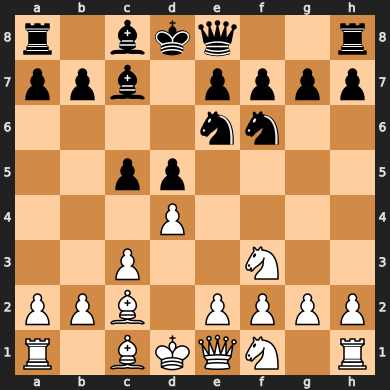

In [83]:
def tensor_to_board(tensor: np.ndarray) -> chess.Board:
    board = chess.Board.empty()
    piece_map = board.piece_map()
    piece_planes = tensor[:12]
    for i in range(64):
        square = chess.SQUARES[i]
        for piece_type in range(6):
            if piece_planes[piece_type][i]:
                piece_map[square] = chess.Piece(piece_type + 1, chess.WHITE)
            elif piece_planes[piece_type + 6][i]:
                piece_map[square] = chess.Piece(piece_type + 1, chess.BLACK)
    board.set_piece_map(piece_map)
    return board

board = tensor_to_board(batch[0][idx])
board

In [90]:
correct = list(sorted(map(str, board.legal_moves)))
maybecorrect = list(sorted(map(str, policy_index[mask])))
correct == maybecorrect

True